# Girvan-Newman Algorithm

The Girvan-Newman algorithm for the detection and analysis of community structure relies on the iterative elimination of edges that have the highest number of shortest paths between nodes passing through them. By removing edges from the graph one-by-one, the network breaks down into smaller pieces, so-called communities. The algorithm was introduced by Michelle Girvan and Mark Newman.

## How does it work ?

The idea was to find which edges in a network occur most frequently between other pairs of nodes by finding edges betweenness centrality. The edges joining communities are then expected to have a high edge betweenness. The underlying community structure of the network will be much more fine-grained once the edges with the highest betweenness are eliminated which means that communities will be much easier to spot.

## Algorithm

The Girvan-Newman algorithm can be divided into four main steps:

1. For every edge in a graph, calculate the edge betweenness centrality.
2. Remove the edge with the highest betweenness centrality.
3. Calculate the betweenness centrality for every remaining edge.
4. Repeat steps 2-4 until there are no more edges left.

## Consider the following Example:

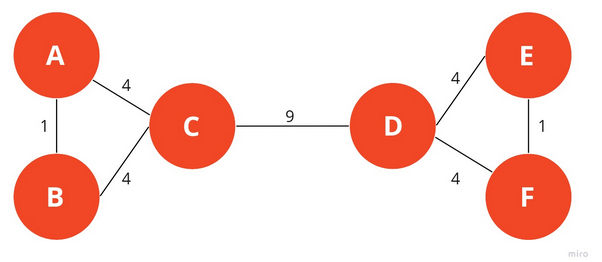

In this example, you can see how a typical graph looks like when edges are assigned weights based on the number of shortest paths passing through them. To keep things simple, we only calculated the number of undirected shortest paths that pass through an edge. The edge between nodes A and B has a strength of 1 because we don’t count A->B and B->A as two different paths.

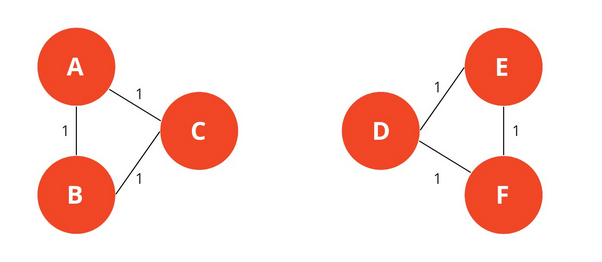

The Girvan-Newman algorithm would remove the edge between nodes C and D because it is the one with the highest strength. As you can see intuitively, this means that the edge is located between communities. After removing an edge, the betweenness centrality has to be recalculated for every remaining edge. In this example, we have come to the point where every edge has the same betweenness centrality.

## Betweeness Centrality

Betweenness centrality measures the extent to which a vertex or edge lies on paths between vertices. Vertices and edges with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.

The calculation of betweenness centrality is not standardized and there are many ways to solve it. It is defined as the number of shortest paths in the graph that pass through the node or edge divided by the total number of shortest paths.

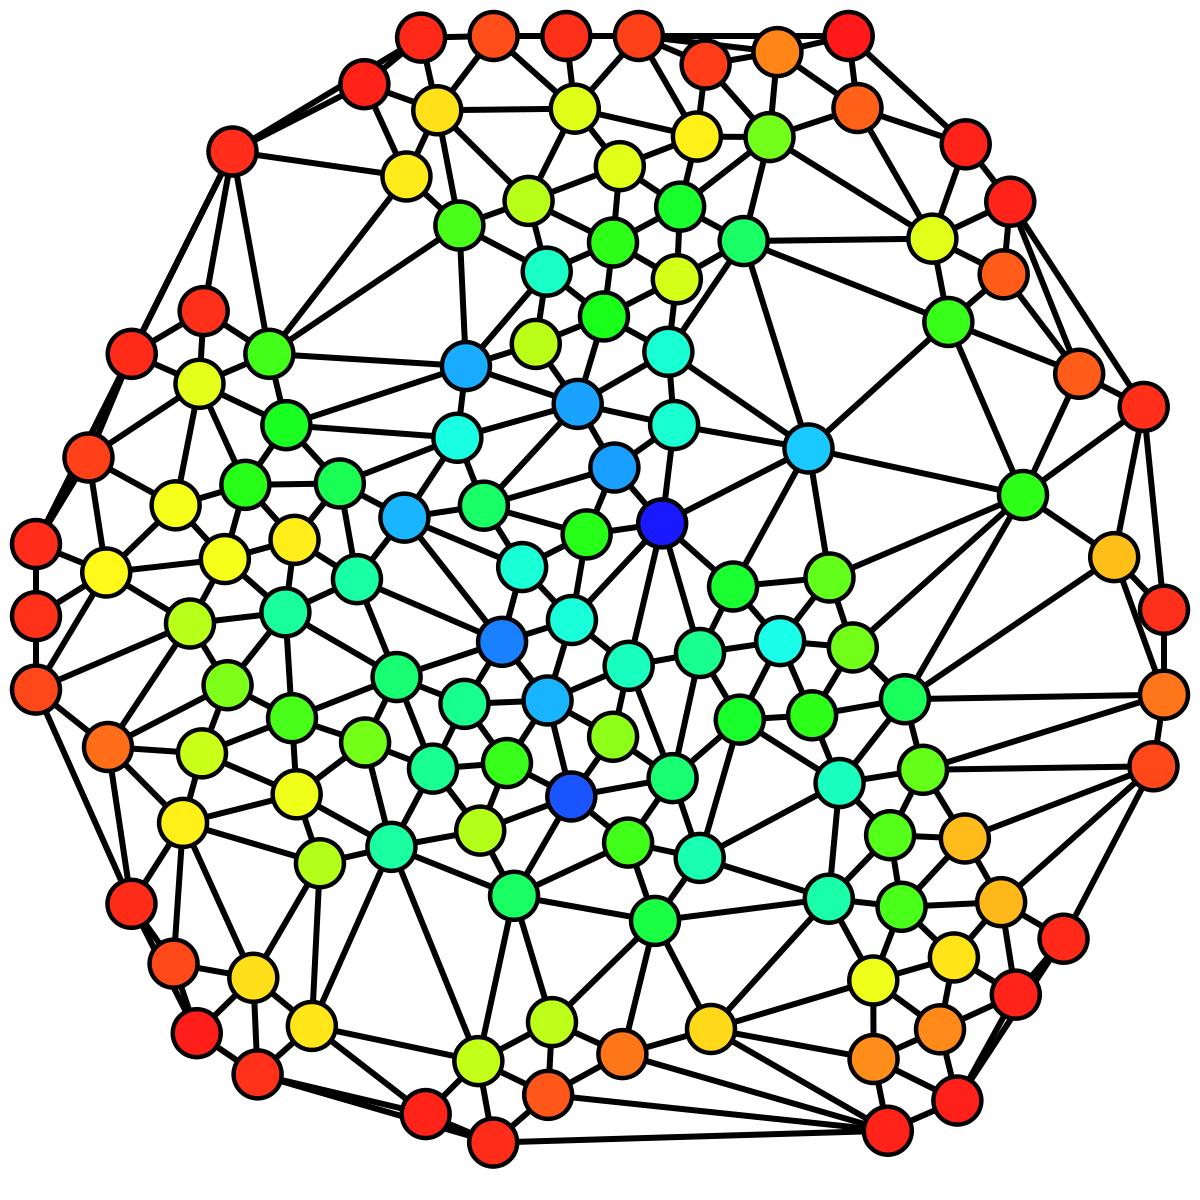

The image above shows an undirected graph colored based on the betweenness centrality of each vertex from least (red) to greatest (blue).

# Task 1 (20 marks)

## Write a function to retrun a random walk from every node of a graph (you can consider the karate club graph for example).

Definition of a random walk:

**Given a graph and a node 'i', we select a neighbor 'j' of 'i' at random and move to this selected neighbor 'j'. Then we move to the neighbor of 'j' and so on.**

More details can be found in this tutorial: https://www.youtube.com/watch?v=Xv0wRy66Big

Write a function that takes a graph 'G' a node 'i' and walk_length=3 and returns a random walk for that node. The random walk is a list of nodes that the walker traversed starting from 'i'.

For example consider the graph G in the following figure with random walk length 3:

Random walk for (i = 0) = [0,1,0], with edges [(0,1), (1,0)]

Random walk for (i = 1) = [1,0,2], with edges [(1,0), (0,2)]

Random walk for (i = 2) = [2,0,2], with edges [(2,0), (0,2)]

**Your function should return [0,1,0] when called as random_walk(G, 0, walk_length=3)**

Note: This is just an example, since the process is random so "random_walk(G, i = 0, walk_length=3)" can return [0,2,0] as well.


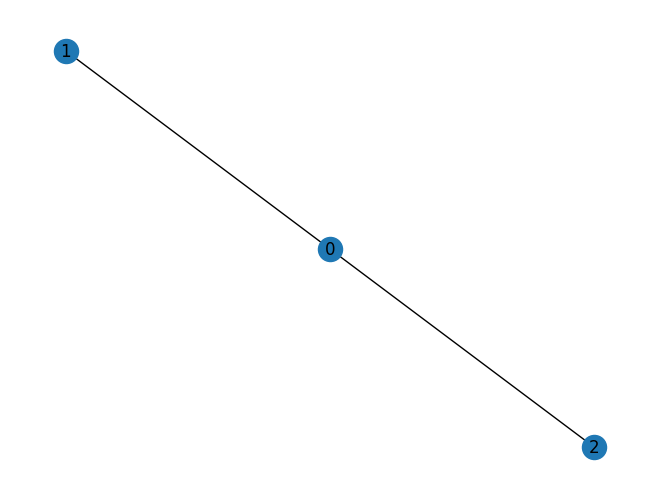

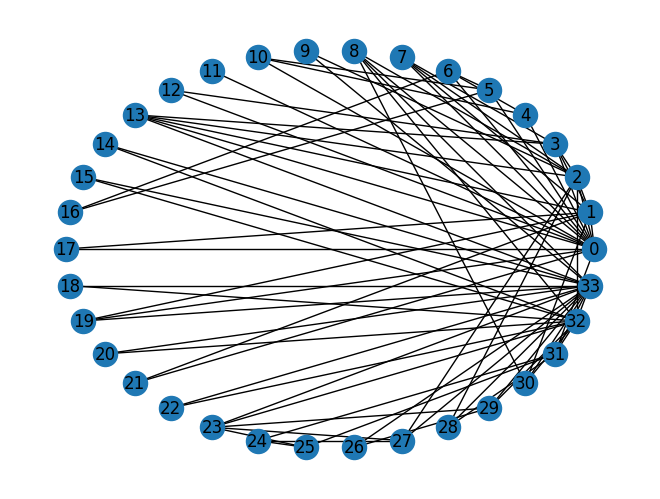

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()
nx.draw_circular(G, with_labels=True)
plt.show()

In [41]:
import random
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()
# nx.draw_circular(G, with_labels=True)
# plt.show()

def random_walk(G, i, walk_length):
  '''
  Write your code here
  '''
  node = i
  walk=[]
  walk.append(node)
  for j in range(walk_length-1):
    neighbors = list(G.neighbors(node))
    #neighbors = list(set(neighbors) -  set(walk))
    if not neighbors:
      break
    # print(neighbors)
    random_neighbor = random.choice(neighbors)
    # print(random_neighbor)
    walk.append(random_neighbor)
    node = random_neighbor
  return walk

for node in G.nodes():
        walk = random_walk(G, node, G.number_of_nodes())
        print(walk)

[0, 3, 7, 0, 31, 0, 2, 1, 3, 13, 33, 31, 0, 8, 30, 33, 13, 3, 13, 0, 8, 32, 29, 26, 29, 33, 31, 28, 33, 26, 33, 18, 33, 14]
[1, 19, 33, 27, 2, 1, 3, 0, 5, 6, 0, 12, 0, 13, 3, 0, 6, 16, 6, 0, 11, 0, 8, 32, 18, 32, 23, 33, 31, 25, 23, 27, 33, 27]
[2, 27, 24, 27, 33, 31, 25, 23, 27, 2, 9, 2, 7, 1, 19, 0, 13, 33, 19, 1, 30, 1, 2, 1, 0, 5, 6, 4, 10, 5, 10, 0, 8, 33]
[3, 2, 7, 1, 2, 3, 2, 27, 2, 8, 33, 13, 1, 30, 33, 22, 33, 8, 33, 20, 32, 29, 33, 19, 33, 22, 32, 31, 24, 25, 31, 25, 23, 32]
[4, 6, 0, 6, 5, 16, 6, 5, 16, 5, 6, 5, 6, 5, 16, 5, 16, 5, 0, 6, 16, 5, 16, 6, 4, 10, 5, 0, 19, 0, 17, 0, 11, 0]
[5, 6, 5, 6, 5, 6, 0, 19, 0, 1, 19, 1, 19, 1, 13, 2, 0, 11, 0, 13, 0, 10, 0, 1, 3, 12, 0, 2, 0, 2, 8, 0, 3, 13]
[6, 5, 0, 21, 0, 2, 13, 33, 8, 2, 7, 3, 1, 19, 1, 0, 6, 16, 6, 4, 0, 21, 1, 19, 1, 19, 0, 6, 4, 10, 4, 10, 4, 0]
[7, 1, 13, 3, 1, 3, 1, 30, 1, 30, 1, 3, 7, 3, 1, 3, 13, 33, 28, 31, 24, 25, 31, 32, 30, 33, 22, 32, 31, 32, 18, 33, 18, 33]
[8, 33, 20, 32, 8, 0, 5, 16, 6, 5, 16, 6, 16, 5,

# Task 2 (20 Marks)

## Now aggreagate the edges that appear in the random walk for each node (use the function random_walk) and count the occurence of each edge. This function will take a graph as input and return a dictionary with the count of edge occurence (divided by the total number of edges including repeated edges) for every edge in the random walk of the graph.

For example consider the previous graphs and the previous walks:

All the edges combined can be listed as
[(0,1), (1,0), (1,0), (0,2), (2,0), (0,2)]

Since we are considering an undirected graph so we will consider (0,1) and (1,0) as the same edge. So the occurence of each edge will be:

(0,1):3

(0,2):3

**The total numbe of edges were 6 so your function should return the dictionary:**

**{(0,1):0.5, (0,2):0.5}**

In [44]:
def rw_edge_betweeness(G):
  '''
  Write your code here
  '''
  walk_length =G.number_of_nodes()
  edges = []
  for i in G.nodes():
    ret = random_walk(G, i, 5)
    for j in range(0,len(ret)-1):
      first = ret[j]
      secnd = ret[j+1]
      edges.append((first,secnd))

  total_number_of_edges = len(edges)
  edge_betweeness_dict = {}
  edges.sort()
  for j in edges:
    if j and j[::-1] not in edge_betweeness_dict:
      occurence = (edges.count(j) + edges.count(j[::-1]))
      # print(occurence)
      edge_betweeness_dict[j] = occurence/total_number_of_edges
  # print(edge_betweeness_dict)
  return edge_betweeness_dict
rw_edge_betweeness(G)

{(0, 1): 0.014705882352941176,
 (0, 2): 0.029411764705882353,
 (0, 3): 0.03676470588235294,
 (0, 5): 0.029411764705882353,
 (0, 6): 0.014705882352941176,
 (0, 8): 0.014705882352941176,
 (0, 10): 0.007352941176470588,
 (0, 11): 0.014705882352941176,
 (0, 12): 0.007352941176470588,
 (0, 13): 0.007352941176470588,
 (0, 17): 0.029411764705882353,
 (0, 21): 0.007352941176470588,
 (1, 13): 0.007352941176470588,
 (1, 17): 0.007352941176470588,
 (1, 19): 0.029411764705882353,
 (2, 8): 0.007352941176470588,
 (2, 13): 0.007352941176470588,
 (2, 28): 0.007352941176470588,
 (3, 2): 0.014705882352941176,
 (3, 7): 0.014705882352941176,
 (3, 12): 0.03676470588235294,
 (3, 13): 0.03676470588235294,
 (4, 6): 0.007352941176470588,
 (5, 6): 0.014705882352941176,
 (5, 10): 0.029411764705882353,
 (5, 16): 0.03676470588235294,
 (6, 16): 0.014705882352941176,
 (8, 30): 0.014705882352941176,
 (8, 32): 0.007352941176470588,
 (8, 33): 0.007352941176470588,
 (9, 2): 0.007352941176470588,
 (10, 4): 0.007352941176

In [ ]:
dict = nx.edge_betweenness_centrality(G)
print(len(dict))
print(dict)

78
{(0, 1): 0.025252525252525245, (0, 2): 0.0777876807288572, (0, 3): 0.02049910873440285, (0, 4): 0.0522875816993464, (0, 5): 0.07813428401663694, (0, 6): 0.07813428401663695, (0, 7): 0.0228206434088787, (0, 8): 0.07423959482783014, (0, 10): 0.0522875816993464, (0, 11): 0.058823529411764705, (0, 12): 0.04652406417112298, (0, 13): 0.04237189825425121, (0, 17): 0.04012392835922248, (0, 19): 0.045936960642843, (0, 21): 0.040123928359222474, (0, 31): 0.1272599949070537, (1, 2): 0.023232323232323233, (1, 3): 0.0077243018419489, (1, 7): 0.007422969187675069, (1, 13): 0.01240556828792123, (1, 17): 0.01869960105254222, (1, 19): 0.014633732280791102, (1, 21): 0.01869960105254222, (1, 30): 0.032280791104320514, (2, 3): 0.022430184194890075, (2, 7): 0.025214328155504617, (2, 8): 0.009175791528732704, (2, 9): 0.030803836686189627, (2, 13): 0.007630931160342923, (2, 27): 0.04119203236850296, (2, 28): 0.02278244631185807, (2, 32): 0.06898678663384543, (3, 7): 0.003365588659706307, (3, 12): 0.012299

# Task 3 (20 Marks)

## Find the communities using the modified Girvan-Newman Algorithm mentioned here (Take help of the functions written above).

The **modified** random walk based Girvan-Newman algorithm can be divided into four main steps:

1. For every edge in a graph, calculate the random walk edge betweenness centrality.
2. Remove the edge with the lowest betweenness centrality.
3. Calculate the random walk betweenness centrality for every remaining edge.
4. Repeat steps 2-4 until there are no more edges left.

Write a function ***GN(G)*** (without using networkx) that takes a graph 'G' as input and follows the **modified Girvan-Newman Algorithm** mentioned previously to find the community for each node in the graph 'G'. Use the 'rw_edge_betweeness()' function that you have written previously. The function should return a list of lists.

Example:

**Consider a graph with 3 nodes as shown above then considering that nodes [0,2] belong to a community and node 1 belongs to another community, then your function should return [[0,2],[1]].**

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [9], [14]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [9], [10], [13], [14], [21]]
[[0, 1, 2, 3, 4, 5, 6, 7, 11, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [8], [9], [10], [12], [13], [14], [21], [22]]
[[0, 1, 2, 3, 7, 11, 15, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [16, 4, 5, 6], [8], [9], [10], [12], [13], [14], [21], [22]]
[[0, 1, 2, 3, 7, 11, 15, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [16, 4, 5, 6], [8], [9], [10], [12], [13], [14], [21], [22]]
[[0, 1, 32, 33, 2, 3, 15, 19, 20, 23, 26, 27, 28, 29, 30, 31], [16, 4, 5, 6], [7], [8], [9], [10], [11], [12], [13], [14], [17], [18], [21], [22], [24, 25]]
[[0, 1, 32, 33, 15, 19, 23, 26, 28, 29, 30, 31], [27, 2, 3], [16, 4, 5, 6], [7], [8], [9], [10], [11], [12], [13], [14], [17], [18],

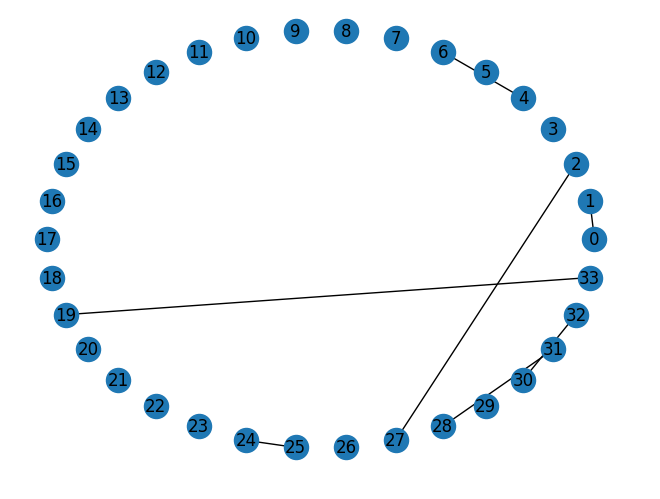

In [46]:
import matplotlib.pyplot as plt
import networkx as nx

def GN(G):
  '''
  Write your code here
  '''
  G = G.copy()
  while 1:
    betweensess =  rw_edge_betweeness(G)
    min_edge  = min(betweensess, key=betweensess.get)
    val = betweensess[min_edge]
    max_edge  = max(betweensess, key=betweensess.get)
    if betweensess[min_edge] == betweensess[max_edge]:
      break;
    while val == betweensess[min(betweensess,key=betweensess.get)]:
      G.remove_edge(*min_edge)
      betweensess.pop(min_edge)
      min_edge  = min(betweensess, key=betweensess.get)


    lst = [list(c) for c in nx.connected_components(G)]
    print (lst)

  '''
  Write your code here
  '''
  nx.draw_circular(G, with_labels=True)
  plt.show()
  # return communities
G = nx.karate_club_graph()
GN(G)

Verify your output using the **actual** Girvan-Newman implementation in networkx.

In [ ]:
import networkx as nx
import random
from collections import defaultdict

def random_walk(graph, start_node, walk_length):
    """
    Perform a random walk starting from a given node.

    Parameters:
    graph : networkx.Graph
        The input graph.
    start_node : node
        The starting node of the random walk.
    walk_length : int
        The number of steps in the random walk.

    Returns:
    walk : list of tuples
        A list of edges (tuples) traversed during the walk.
    """
    walk = []
    current_node = start_node

    for _ in range(walk_length):
        neighbors = list(graph.neighbors(current_node))
        if not neighbors:
            break
        next_node = random.choice(neighbors)
        walk.append((current_node, next_node) if current_node < next_node else (next_node, current_node))
        current_node = next_node

    return walk

def aggregate_random_walk_edges(graph, num_walks=100, walk_length=10):
    """
    Perform multiple random walks and count the occurrences of each edge.

    Parameters:
    graph : networkx.Graph
        The input graph.
    num_walks : int
        The number of random walks to perform from each node.
    walk_length : int
        The length of each random walk.

    Returns:
    edge_frequencies : dict
        A dictionary with edge as key and its normalized frequency as value.
    """
    edge_counts = defaultdict(int)
    total_edges = 0

    # Perform random walks starting from each node in the graph
    for node in graph.nodes():
        for _ in range(num_walks):
            walk_edges = random_walk(graph, node, walk_length)
            for edge in walk_edges:
                edge_counts[edge] += 1
                total_edges += 1

    # Normalize the edge frequencies
    edge_frequencies = {edge: count / total_edges for edge, count in edge_counts.items()}

    return edge_frequencies

# Example usage
if __name__ == "__main__":
    G = nx.karate_club_graph()  # Example graph
    edge_frequencies = aggregate_random_walk_edges(G, num_walks=100, walk_length=10)

    # Print the normalized edge frequencies
    for edge, freq in edge_frequencies.items():
        print(f"Edge {edge}: {freq:.4f}")


Edge (0, 17): 0.0125
Edge (0, 8): 0.0122
Edge (2, 8): 0.0115
Edge (0, 2): 0.0116
Edge (8, 32): 0.0120
Edge (22, 32): 0.0127
Edge (22, 33): 0.0118
Edge (31, 33): 0.0126
Edge (0, 7): 0.0135
Edge (2, 7): 0.0123
Edge (2, 13): 0.0116
Edge (1, 13): 0.0115
Edge (1, 17): 0.0123
Edge (0, 4): 0.0131
Edge (4, 10): 0.0148
Edge (0, 10): 0.0146
Edge (4, 6): 0.0147
Edge (6, 16): 0.0166
Edge (5, 16): 0.0149
Edge (0, 11): 0.0143
Edge (1, 7): 0.0128
Edge (13, 33): 0.0117
Edge (0, 19): 0.0125
Edge (1, 19): 0.0117
Edge (1, 30): 0.0126
Edge (30, 33): 0.0131
Edge (32, 33): 0.0121
Edge (2, 32): 0.0124
Edge (8, 33): 0.0123
Edge (15, 33): 0.0132
Edge (15, 32): 0.0128
Edge (0, 21): 0.0124
Edge (0, 6): 0.0126
Edge (0, 3): 0.0127
Edge (3, 13): 0.0122
Edge (27, 33): 0.0107
Edge (5, 6): 0.0151
Edge (0, 5): 0.0136
Edge (2, 3): 0.0122
Edge (31, 32): 0.0136
Edge (24, 31): 0.0129
Edge (0, 31): 0.0124
Edge (19, 33): 0.0130
Edge (18, 33): 0.0141
Edge (14, 33): 0.0130
Edge (8, 30): 0.0119
Edge (20, 33): 0.0123
Edge (3, 7)

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


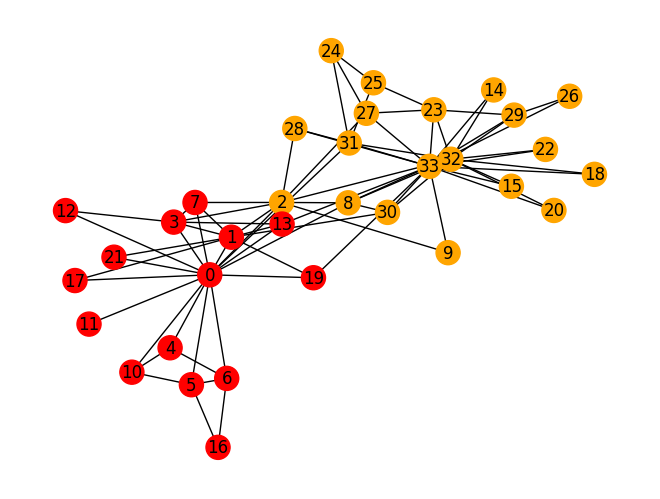

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

G = nx.karate_club_graph()
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("orange")
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

# Task 4 (10 Marks)

## Use the karate club network and find the communities using the algorithm (modified Girvan-Newman) that you just wrote. Then plot the network such that nodes in the same community have the same color. Also, use node labels in the plot.



# Task 4 (30 Marks)

## Use edge clustering co-efficient instead of edge betweeness

In the previous tasks we use the random walk edge betweeness centrality to find communities and the algorithm worked by deleting edges with low betweeness. In this case we will find clustering co-efficient of an edge and delete the edge with the lowest clustering co-efficient.

Steps to find the clustering co-efficient of an edge:

For each edge (u,v) do:

1. Find the neighboring nodes of node 'u' call it set *N(u)*.
2. Find the neighboring nodes of node 'v' call it set *N(v)*.
3. Take an intersection of sets *N(u)* and *N(v)* and call it *N(u,v)*.
4. Calculate the sum of the number of edges between the each pair of nodes in *N(u,v)*. This is the number of edges that exist between the common neighbors of u and v. Call this number as **n**.
5. The clustering coefficient of the edge (u,v) can be defined as: **n**/(|N(u,v)| ***C*** 2). In the equation |N(u,v)| represents the cardinality of the set *N(u,v)* and operator ***C*** denotes the combination operator (For example 5 ***C*** 2 is 10).

Find the clustering co-efficient of each edge using the above algorithm.
For this modify the **edge_betweeness** function as mentioned above to implement this logic and change the name of this new function to **edge_clustering_coeff**.

The modified Girvan-Newman algorithm can be divided into four main steps:

1. For every edge in a graph, calculate the edge clustering co-efficient.
2. Remove the edge with the lowest clustering co-efficient.
3. Calculate the clustering co-efficient for every remaining edge.
4. Repeat steps 2-4 until there are no more edges left.



### PLEASE NOTE: The input and output format of the 'edge_clustering_coeff' and 'rw_edge_betweeness' function should be the same.





In [60]:
import networkx as nx

def edge_clustering_coeff(G):
  '''
  Write your code here
  '''
  for edge in G.edges(G):
    nu  = set(G.neighbors(edge[0]))
    nv  = set(G.neighbors(edge[1]))
    nuv = nu.intersection(nv)



  #return edge_clustering_coeff_dict()
G = nx.karate_club_graph()
edge_clustering_coeff(G)

{2, 3, 7, 13, 17, 19, 21}
{1, 3, 7, 8, 13}
{1, 2, 7, 12, 13}
{10, 6}
{10, 6}
{4, 5}
{1, 2, 3}
{2}
{4, 5}
set()
{3}
{1, 2, 3}
{1}
{1}
{1}
set()
{0, 3, 13, 7}
{0, 2, 13, 7}
{0, 2, 3}
{0, 2, 3}
{0}
{0}
{0}
set()
{0, 1, 13, 7}
{0, 1, 3}
{0, 32}
set()
{0, 1, 3}
set()
set()
{8}
{0, 1, 2}
{0}
{0, 1, 2}
{0}
{0}
{0, 16}
{0}
{6}
{5}
{32, 33}
{33, 2, 30}
{32, 30}
set()
set()
{33}
{32}
{33}
{32}
{33}
{32}
set()
{33}
{32}
{33}
{32}
set()
{33}
{32, 33}
{33, 29}
{32, 27, 29}
{31}
set()
{25}
{24}
{33}
{29}
{23}
{33}
{31}
{33, 23}
{32, 26, 23}
{8, 33}
{8, 32}
{33}
{32, 28}
{8, 14, 15, 18, 20, 22, 23, 29, 30, 31}


Now find the communities by changing the **rw_edge_betweeness** function by the **edge_clustering_coeff** function.

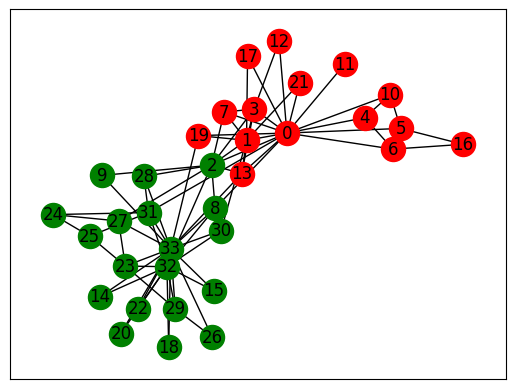

Communities: [[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def girvan_newman(G, num_communities):
    """
    Girvan-Newman algorithm to detect communities in a graph G.

    Parameters:
    G : networkx.Graph
        The graph to find communities in.
    num_communities : int
        The number of communities to stop at.

    Returns:
    List of sets containing nodes that belong to each community.
    """
    # Make a copy of the graph to avoid modifying the original graph
    G = G.copy()

    def edge_to_remove(G):
        """
        Function to calculate edge betweenness centrality and return the edge with the highest value.
        """
        # Compute edge betweenness centrality
        edge_betweenness = nx.edge_betweenness_centrality(G)
        # Return the edge with the maximum betweenness centrality
        return max(edge_betweenness, key=edge_betweenness.get)

    # Keep removing edges until the number of connected components equals num_communities
    while nx.number_connected_components(G) < num_communities:
        edge = edge_to_remove(G)
        G.remove_edge(*edge)

    # Get the connected components (communities)
    return [list(c) for c in nx.connected_components(G)]

# Example usage
if __name__ == "__main__":
    # Create a sample graph
    G = nx.karate_club_graph()  # Using the famous Zachary's Karate Club dataset

    # Apply Girvan-Newman algorithm to split into 3 communities
    communities = girvan_newman(G, 2)

    # Visualize the communities
    pos = nx.spring_layout(G)  # For better layout
    colors = ['r', 'g', 'b']  # Color for each community

    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i])

    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

    plt.show()

    print("Communities:", communities)


In [ ]:
def GN(G):
  '''
  Write your code here
  '''
  betweeness_edges = edge_clustering_coeff(G)
  '''
  Write your code here
  '''
  return communities

Use the karate club network and find the communities using the modified algorithm (considering edge clustering co-efficient) that you just wrote. Then plot the network such that nodes in the same community have the same color. Also, use node labels in the plot.

# ----------- Thank You -----------